## Projeto 1 - Análise de Algoritmos

### Equipe: 
    Pedro Ivo Penha
    Renan Carneiro Batista

### Resolução da Questão 8
    Insertion Sort comparado com o Insertion Sort com busca binária da Seção 4.

***
#### Importar as Bibliotecas Necessárias

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

#### Função Busca Binária

In [2]:
 def buscaBinaria(array, key, start, end):
    if end - start <= 1:
        if key < array[start]:
            return start - 1
        else:
            return start
 
    mid = (start + end)//2
    if array[mid] < key:
        return buscaBinaria(array, key, mid, end)
    elif array[mid] > key:
        return buscaBinaria(array, key, start, mid)
    else:
        return mid 

#### Função Insertion Sort Binário

In [3]:
def insertionSortBinario(array):
    TempoInicial = time.time()

    for i in range(1, len(array)):
        temp = array[i]
        pos = buscaBinaria(array, temp, 0, i) + 1
 
        for k in range(i, pos, -1):
            array[k] = array[k - 1]
 
        array[pos] = temp
    
    TempoFinal = time.time()
    TempoTotal = TempoFinal - TempoInicial
    
    row[2] = TempoTotal
    
    print("\n--== Insertion Sort Binário ==--")
    print("Tempo de execução:", TempoTotal, "segundos.")
    
    return array

#### Função Insertion Sort Normal

In [4]:
def insertionSort(array):
    TempoInicial = time.time()
    
    for i in range(1, len(array)):
        key = array[i]
        j = i - 1
        
        while j >= 0 and key < array[j]:
            array[j+1] = array[j]
            j -= 1
        array[j+1] = key
    
    TempoFinal = time.time()
    TempoTotal = TempoFinal - TempoInicial
    
    row[1] = TempoTotal
    
    print("\n--== Insertion Sort Normal ==--")
    print("Tempo de execução:", TempoTotal, "segundos.")
    
    return array

#### Gerar um tamanho para o array e criar um data frame vazio para armazenar as comparações

In [5]:
tamanhoArray = np.random.randint(10, 10000, size=(10))
comp_df = pd.DataFrame()

#### Executar as duas funções Insertion Sort

In [6]:
for i in range(len(tamanhoArray)):
    array = np.random.randint(-2*tamanhoArray[i], 2*tamanhoArray[i], size=(tamanhoArray[i]))
    
    row = np.empty(3)
    row[0] = len(array)
    
    print("\nVetor Desordenado: ", array)
    print("Vetor Ordenado: ", insertionSort(array))
    print("\n")

    print("Vetor Ordenado: ", insertionSortBinario(array))
    print("\n") 
    
    comp_df = pd.concat([comp_df, pd.DataFrame(row).T])
    del(row)


Vetor Desordenado:  [-6552 -6392  3702 ... -6117  3782  1733]

--== Insertion Sort Normal ==--
Tempo de execução: 1.8673062324523926 segundos.
Vetor Ordenado:  [-7381 -7376 -7375 ...  7367  7368  7380]



--== Insertion Sort Binário ==--
Tempo de execução: 0.0156252384185791 segundos.
Vetor Ordenado:  [-7381 -7376 -7375 ...  7367  7368  7380]



Vetor Desordenado:  [ 9260 -2494 14636 ... 12272 18879 -3469]

--== Insertion Sort Normal ==--
Tempo de execução: 13.269150257110596 segundos.
Vetor Ordenado:  [-19450 -19449 -19448 ...  19447  19448  19450]



--== Insertion Sort Binário ==--
Tempo de execução: 0.0624995231628418 segundos.
Vetor Ordenado:  [-19450 -19449 -19448 ...  19447  19448  19450]



Vetor Desordenado:  [ 2682 -1005 -2003 ... -1471 -3542 -2272]

--== Insertion Sort Normal ==--
Tempo de execução: 0.496706485748291 segundos.
Vetor Ordenado:  [-3707 -3705 -3681 ...  3697  3701  3705]



--== Insertion Sort Binário ==--
Tempo de execução: 0.01562809944152832 segundos.
Vetor

#### Mudar o nome das colunas do data frame

In [7]:
comp_df = comp_df.rename({0: 'Tamanho da Entrada', 1: 'Insertion Sort Normal', 2: 'Insertion Sort Binário'}, axis=1)
comp_df = comp_df.reset_index(drop=True)

#### Exibir o data frame com as comparações

In [8]:
display(comp_df)

,Tamanho da Entrada,Insertion Sort Normal,Insertion Sort Binário
0,3691.0,1.867306,0.015625
1,9727.0,13.269150,0.062500
2,1854.0,0.496706,0.015628
3,1572.0,0.351320,0.007998
4,5477.0,4.304765,0.046854
5,8134.0,9.380546,0.046898
6,6787.0,7.255649,0.046875
7,1105.0,0.171870,0.012123
8,2255.0,0.727988,0.008097
9,425.0,0.031256,0.000000


#### Ordenar os valores do data frame para representação dos valoros em ordem crescente em um gráfico

In [9]:
comp_df = comp_df.sort_values(by=['Tamanho da Entrada'])
comp_df = comp_df.reset_index(drop=True)

#### Gerar o gráfico do data frame com os tempos de execução por tamanho de entrada

<AxesSubplot:xlabel='Tamanho da Entrada', ylabel='Tempo de Execução (em segundos)'>

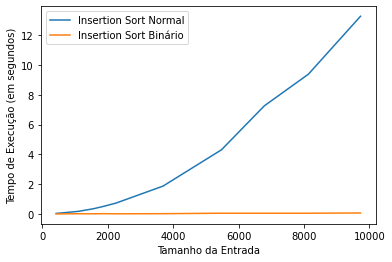

In [10]:
comp_df.plot(x = 'Tamanho da Entrada', xlabel = 'Tamanho da Entrada', ylabel = 'Tempo de Execução (em segundos)')

***
## Conclusão
<div style="text-align: justify">O Insertion Sort é um dos algoritmos de ordenação de implementação mais simples, basicamente, a ordenação por inserção é eficiente para pequenos valores de dados, e para vetores que já estejam totalmente ordenados. É sabido que o Insertion Sort é Θ(n²).
A busca binária é um algoritmo de busca bem performático em buscar um item numa lista ordenada. Ela funciona dividindo repetidamente pela metade uma parte da lista que deve conter o item, e comparar com o item na posição do meio se o item procurado deve estar em uma posição acima ou abaixo da sua, e repetindo até chegar no item buscado. Sabe-se que desde que a lista esteja ordenada a busca binária apresenta complexidade Θ(lg n).
O Insertion Sort com busca binária é um algoritmo de ordenação como o Insertion Sort, mas em vez de usar a pesquisa linear para encontrar o local onde um elemento deve ser inserido, usamos a busca binária. Assim, reduzimos o limite superior da busca de Θ(N) para Θ(log N). Idealmente o Insertion Sort com busca binaria poderia ser dito como Θ(N(lgN)), porém por ter de fazer o shift, ou troca, entre os itens a ser ordenados do array, acaba não sendo Θ(N(lgN)), sendo apenas Θ(N²).
Portanto, tanto o Insertion Sort quanto o Insertion Sort com busca binaria são Θ(N²), porém o Insertion Sort com busca binaria ainda é melhor, mesmo que não o suficiente para ser um Θ de ordem menor, mas ainda performa melhor que o Insertion Sort Padrão como pode-se notar nos testes.</div>